## Filters in Python using SciPY! (For NUance Lab 5)
As always, your first stop should be the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

You can tune a few things about the filter example below. 

### Low pass or high pass
A low pass filter will remove high frequency components of a signal (e.g., "noise"), while a high pass filter will remove any low frequency offsets or those that don't vary with time (i.e. "DC"). 

### Filter order
This factor (as an integer) determines the "sharpness" of the filter, or over what frequency band it goes from passing a signal to blocking it. One is the lowest order, and increasing this value increases order and sharpness.

### Cutoff frequency
This determines at what frequency the signal strength will be attenuated to -3 dB, or half the signal's power. Since we are working on sampled signals, we need to make sure we work below the Nyquist frequency (half the sampling rate) to avoid aliasing. Please always make sure your cutoff frequency is below your Nyquist frequency. More here: https://en.wikipedia.org/wiki/Nyquist_frequency  

Once you have filtered your magnetometer and integrated rotational rate, you can fuse the two estimates of yaw ( using a simple complementary filter approach. This documentation has a nice overview, as does the Navigation Primer for the VectorNav: https://ahrs.readthedocs.io/en/latest/filters/complementary.html

You can implement a complementary filter with something like:
Fused = $\alpha \psi_{mag} + (1 - \alpha) \psi_{gyro}$

If you chose a value of $\alpha = 0.5$, that would equally weight the contributions of the magnetometer and the gyro. Typically we wouldn't hand tune this in a real system, but you should for this assignment. Please tell us what value of $\alpha$ gives you the "best looking" results!

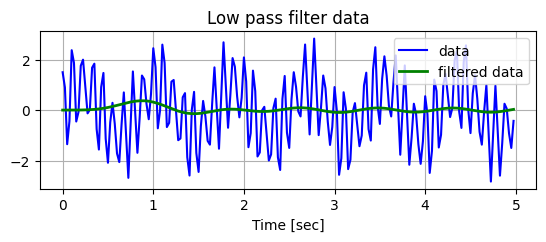

In [41]:
#Modified from DelftStack https://www.delftstack.com/howto/python/low-pass-filter-python/
#Original author: Vaibhhav Khetarpal

import numpy as np
from scipy.signal import butter, sosfilt, freqz
import matplotlib.pyplot as plt

def butter_filter(raw_data, cutoff_freq, sampl_freq, filt_type, filt_order):
    nyq_freq = sampl_freq / 2 #set the Nyquist frequency (important to avoid aliasing)
    sos = butter(N = filt_order, Wn = cutoff_freq / nyq_freq, btype=filt_type, analog=False, output='sos')
    filtered_data = sosfilt(sos, raw_data)
    return sos, filtered_data

# Setting filter requirements
order = 1 #you can increase this to make the filter "sharper"
sampl_freq = 200 #change to sampling frequency of your data collection
cutoff_freq = 3.667 #modify this value to get an appropriate cutoff frequency. This can't be any higher than sampling freq 

# Creating some made up, noisy data tp show filter properties
T = 5.0  # value taken in seconds
n = int(T * fs)  # indicates total samples
t = np.linspace(0, T, n, endpoint=False)

data = (
    np.sin(1.2 * 2 * np.pi * t)
    + 1.5 * np.cos(9 * 2 * np.pi * t)
    + 0.5 * np.sin(12.0 * 2 * np.pi * t)
)

# Filtering and plotting
sos, y = butter_filter(data, cutoff_freq, sampl_freq, "lowpass", 5)

plt.subplot(2, 1, 2)
plt.plot(t, data, "b-", label="data")
plt.plot(t, y, "g-", linewidth=2, label="filtered data")
plt.xlabel("Time [sec]")
plt.title("Low pass filter data")
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()
